# Introduction:

The dataset that I will be analyzing in this notebook contains data about housing prizes in Ames, Iowa. My goal will be to create a regression model that can accurately predict residential home prices based on the information given. This dataset is a started dataset from the site kaggle.com

# Preliminary Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import training data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Analysis: SalePrice

Since our target variable is the sales price, we will look at that first:

In [3]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lets see if we can express this information in a more visual manner:

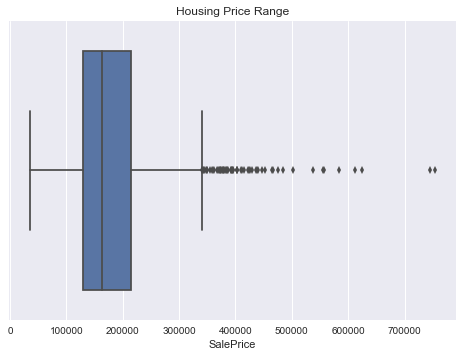

In [4]:
plt.title('Housing Price Range')
sns.boxplot(x='SalePrice',data=df)

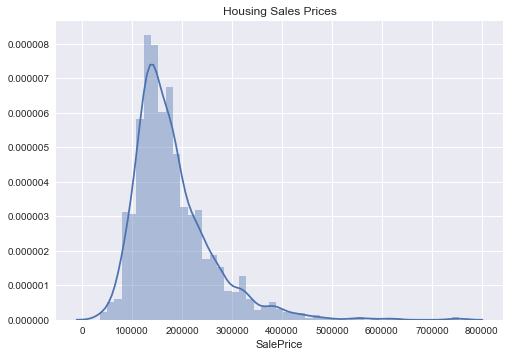

In [5]:
plt.title('Housing Sales Prices')
sns.distplot(df.SalePrice)

As we can see from the above graphs, the mean price of houses in Iowa is a little less than $200000, and the data is skewed mostly to the left. Prices above 350000-400000 seem to be mostly outliers.

## Feature Analysis: MSSubClass

The MSSubClass feature describes the type of house that is on the market. It uses numeric assignments to define features of the house such as the number of floors in the house and when it was built. The individual meanings of each of these numeric assignments is available in the data_description.txt file.

In [6]:
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

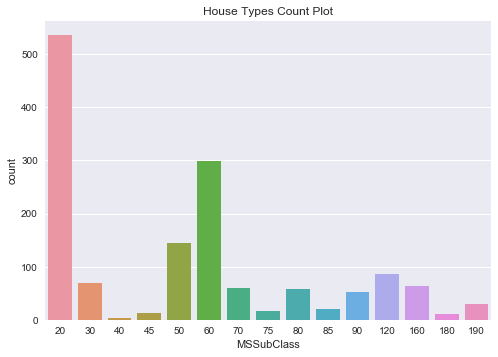

In [7]:
plt.title('House Types Count Plot')
sns.countplot(x=df.MSSubClass)

As we can see, most houses (by a large margin) are either in categories 20 or 60, which mean 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER respectively.
From this we can see that there are more houses newer than 1946 on the market that houses made earlier.
Now lets see if this difference in supply has an impact on the SalePrice of the houses:

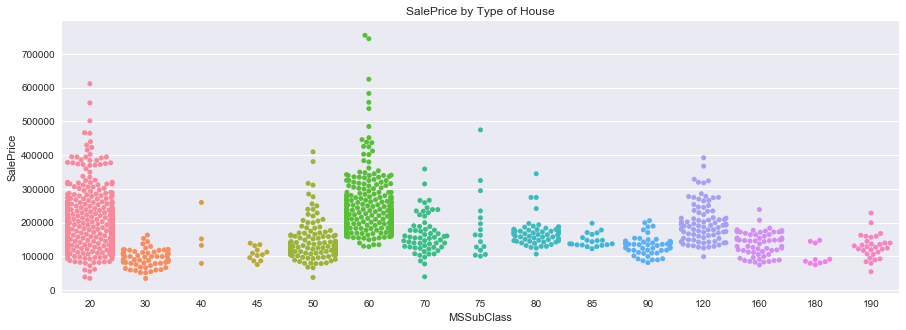

In [8]:
plt.figure(figsize=(15,5))
plt.title('SalePrice by Type of House')
sns.swarmplot(x='MSSubClass',y='SalePrice',data=df)

We see here that the mean sales price seems to be higher for category 60, which means newer houses with 2 floors. This is unsurprising, as one would expect bigger and newer houses to be selling for more.
Based on this information, let us now try to analyze the SalePrice by the age of the house:

In [9]:
#Define a function to sort the house categories based on age
def Sort_Age(x):
    #Lists created from definitions in data_description.txt
    new_houses = [20,60,120,160]
    old_houses = [30,70]
    if x in new_houses:
        return 'New'
    elif x in old_houses:
        return 'Old'
    else:
        return 'All_Ages'

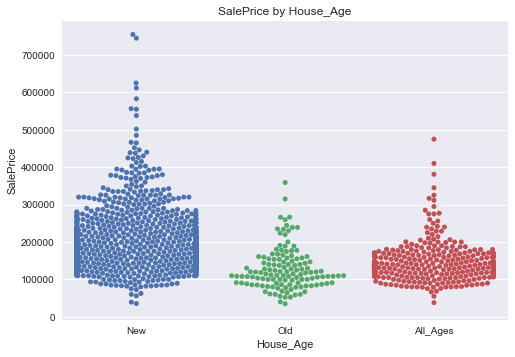

In [10]:
df['House_Age'] = df.MSSubClass.apply(Sort_Age)

#Add the House_Age variable the test dataset
df_test['House_Age'] = df_test.MSSubClass.apply(Sort_Age)

#Graph the relationship between House_Age and SalePrice
plt.title('SalePrice by House_Age')
sns.swarmplot(x='House_Age',y='SalePrice',data=df)

This graph shows us that newer houses do in fact have a higher mean SalePrice than older houses, indicating that House-Age will be a useful variable to predict the SalePrice. 
However, it should also be taken into consideration that there are more New properties for sale than Old ones, which could be causing the disparity we see here.

## Feature Analysis: MSZoning

This feature defines the Zoning Classification of the sale area. Like the feature above, it uses codes to shorten the names of the categories. The full names can be found in data_description.txt

In [11]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

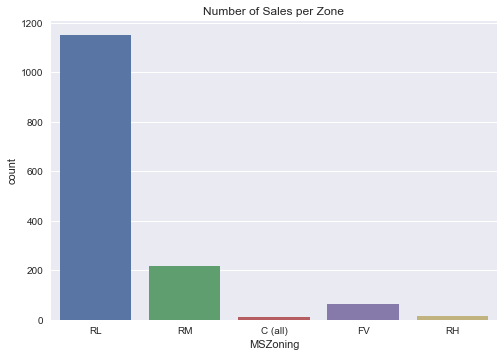

In [12]:
plt.title('Number of Sales per Zone')
sns.countplot(x=df.MSZoning)

By a large margin, there are more sales in Residential Low Density zones than in any other. The scale of the disparity is such that it reduces the usefulness of this feature for predictive purposes. Nevertheless, let us see if there are any insights from comparing this to the SalePrice 

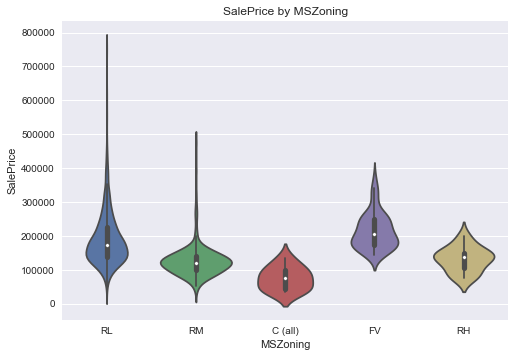

In [13]:
plt.title('SalePrice by MSZoning')
sns.violinplot(x='MSZoning',y='SalePrice',data=df)

We can see that Floating Villages have the highest mean SalePrice, which might indicate that such plots are in high demand. Again however, the usefulness of this data is tempered by the extent to which Low Density Residential properties outweigh all other categories.

## Feature Analysis: Lot Frontage and Lot Area

Lot Frontage describes the amount of street connected to the property in terms of linear feet.
Lot Area describes the size of the property in square feet. These two variables are being analysed together as they both provide us a sense of the amount of area that the property directly exerts influence over, in essence, how much 'bang for the buck' the buyer is getting, since as we all know, the only thing that matters in real estate is Location Location Location!

Let us first take a look at LotFrontage:

In [14]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

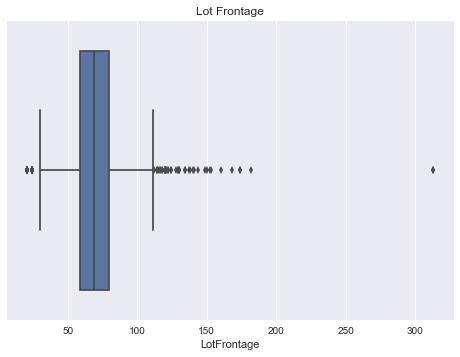

In [15]:
plt.title('Lot Frontage')
sns.boxplot(x=df.LotFrontage[df.LotFrontage.notnull()])

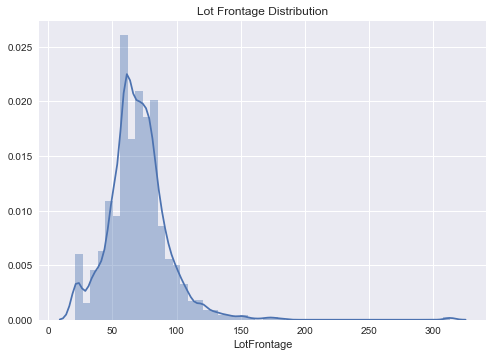

In [16]:
plt.title('Lot Frontage Distribution')
sns.distplot(df.LotFrontage[df.LotFrontage.notnull()])

In [17]:
df.LotFrontage.isnull().sum()

259

Since some values are null in the LotFrontage variable, I take this to mean some properties don't have connected streets. This makes sense for houses in the country or commercial ventures far from most cities. Thus I am imputing 0 as the missing value.

In [18]:
df['LotFrontage'] = df.LotFrontage.fillna(0)

#Impute the mean of LotFrontage into the training data
df_test['LotFrontage'] = df_test.LotFrontage.fillna(0)

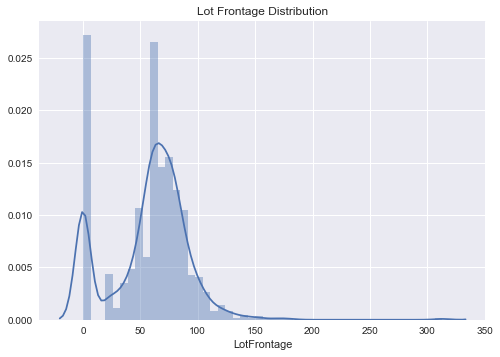

In [19]:
plt.title('Lot Frontage Distribution')
sns.distplot(df.LotFrontage)

Now that we've seen the distribution of the LotFrontage, lets look at the LotArea variable:

In [20]:
df.LotArea.isnull().sum()

0

In [21]:
df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

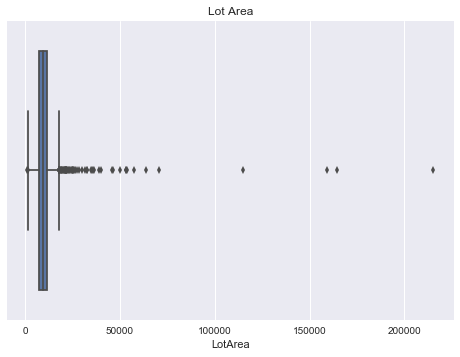

In [22]:
plt.title('Lot Area')
sns.boxplot(x=df.LotArea)

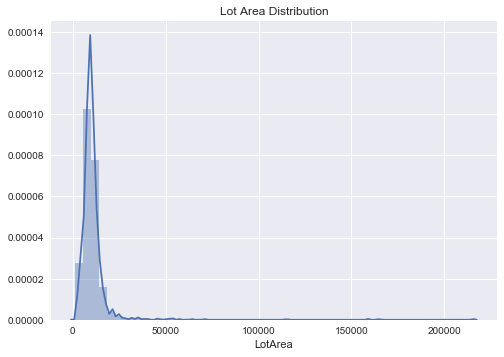

In [23]:
plt.title('Lot Area Distribution')
sns.distplot(df.LotArea)

The distribution of this variable is very left skewed, with a mean area of 10000 sq feat, with several outliers up to even 200000 sq feat.

Now let us see if there is any correlation between the LotArea and the LotFrontage:

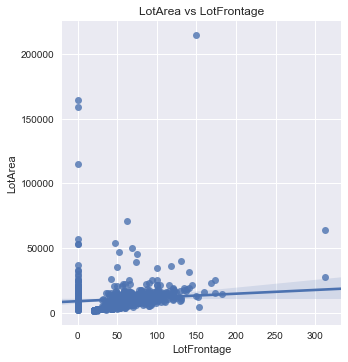

In [24]:
sns.lmplot(y='LotArea',x='LotFrontage',data=df)
plt.title('LotArea vs LotFrontage')

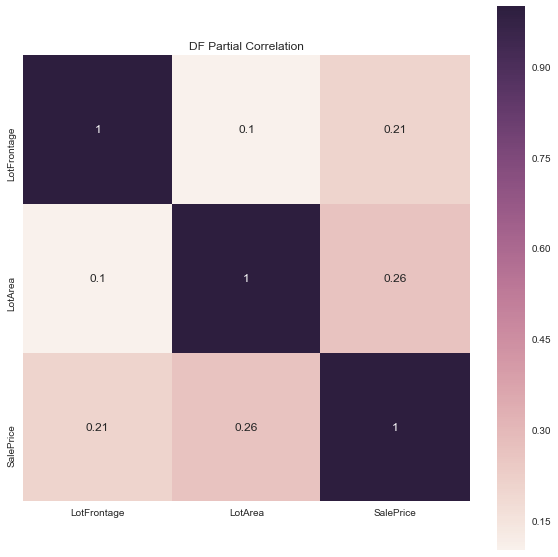

In [25]:
corr = df[['LotFrontage','LotArea','SalePrice']].corr()
plt.figure(figsize=(10,10))
plt.title('DF Partial Correlation')
sns.heatmap(corr,annot=True,square=True)

LotArea and LotFrontage seem weakly correlated both with each other and with the SalePrice target variable. This means it might not be that useful as a variable.

## Feature Analysis: Street

This variable describes what types of road have access to the property, either a paved road or a gravel road.

In [26]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

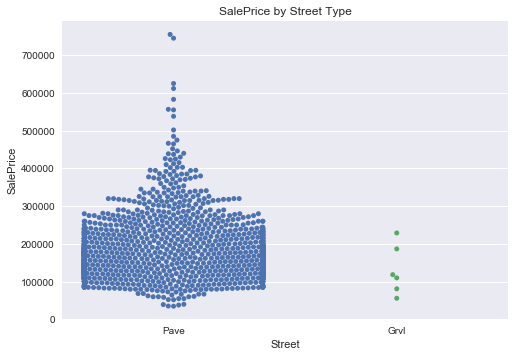

In [27]:
plt.title('SalePrice by Street Type')
sns.swarmplot(x='Street',y='SalePrice',data=df)

Because only 6 out of 1460 sales have gravel streets, this variable is not that useful to us in terms of predicting the SalePrice.

## Feature Analysis: Alley

This feature describes the types of alleys that have access to the property.

In [28]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
df.Alley.fillna('None',inplace=True)

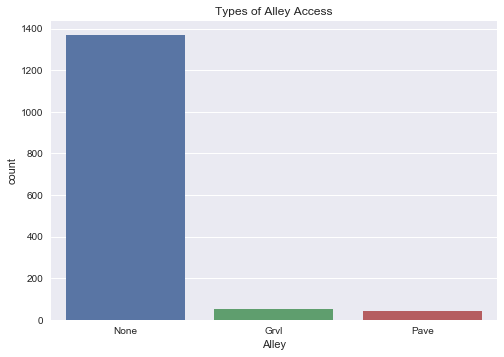

In [30]:
plt.title('Types of Alley Access')
sns.countplot(df.Alley)

As with Street, we see a massive disparity in numbers between properties who have alley access and those who do not at all. This limits how useful this feature will be.

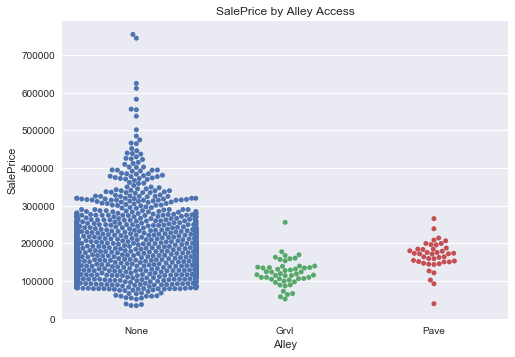

In [31]:
plt.title('SalePrice by Alley Access')
sns.swarmplot(x='Alley',y='SalePrice',data=df)

It seems that Paved Gravel access has a slightly higher SalePrice mean, but again the fact that most of the properties have no alley access means that the usefulness of this information is limited

## Feature Analysis: LotShape

LotShape is a general description of the shape of the property.

In [32]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

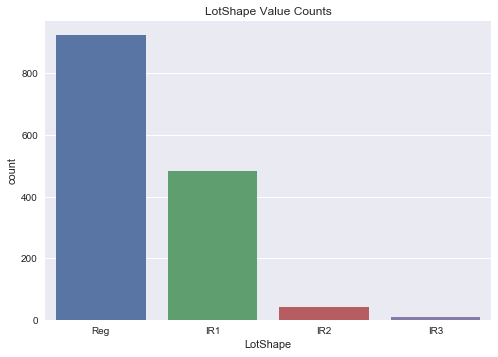

In [33]:
plt.title('LotShape Value Counts')
sns.countplot(df.LotShape)

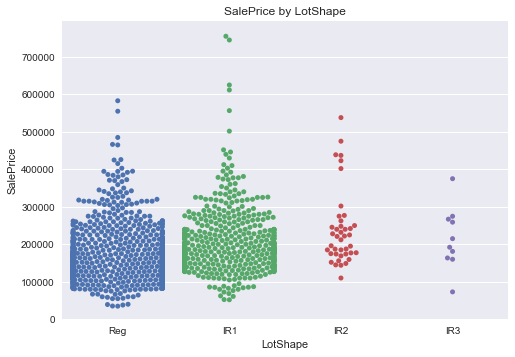

In [34]:
plt.title('SalePrice by LotShape')
sns.swarmplot(x='LotShape',y='SalePrice',data=df)

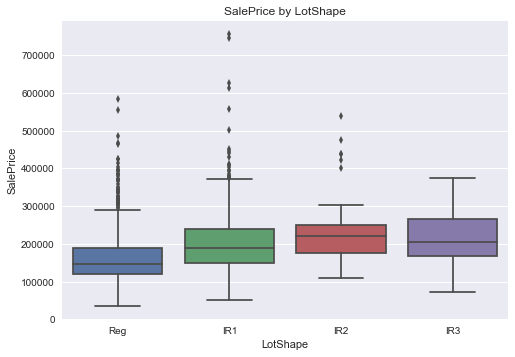

In [35]:
plt.title('SalePrice by LotShape')
sns.boxplot(x='LotShape',y='SalePrice',data=df)

It is looking like the more irregular a property is, the higher the mean SalePrice of the property is.

## Feature Analysis: LandContour & LandSlope

While LandShape describes the general shape of the land, LandContour more describes how flat the land is. Because of this, we will at the same time look at the LandSlope, to gain a more complete picture of the texture of the land.

In [36]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

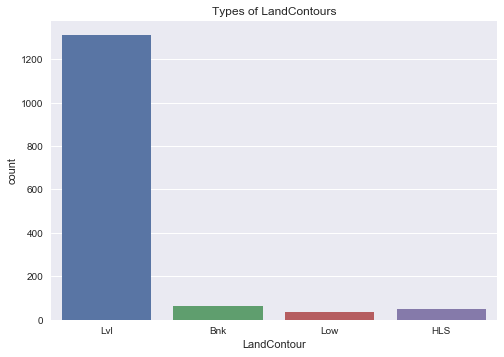

In [37]:
plt.title('Types of LandContours')
sns.countplot(df.LandContour)

Most of the properties seem to be on Level ground, which is not surprising since that is an ideal scenario for most residential construction. What interests me now is the relative price difference even with this disparity in numbers.

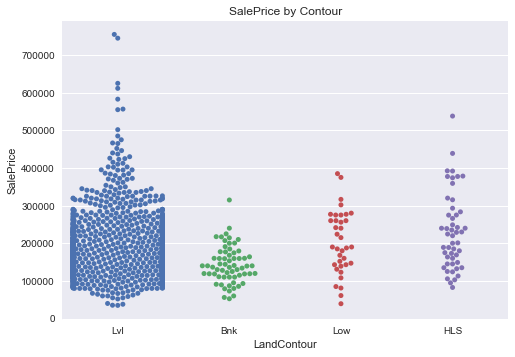

In [38]:
plt.title('SalePrice by Contour')
sns.swarmplot(x='LandContour',y='SalePrice',data=df)

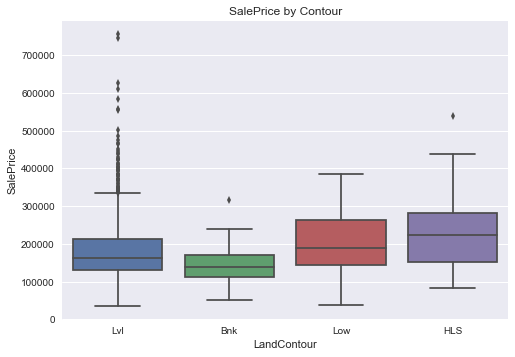

In [39]:
plt.title('SalePrice by Contour')
sns.boxplot(x='LandContour',y='SalePrice',data=df)

As suspected, the average SalePrice tends to rise as the contour of the land becomes more hilly. Now lets see if such a trend is reinforced with the LandSlope variable.

In [40]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

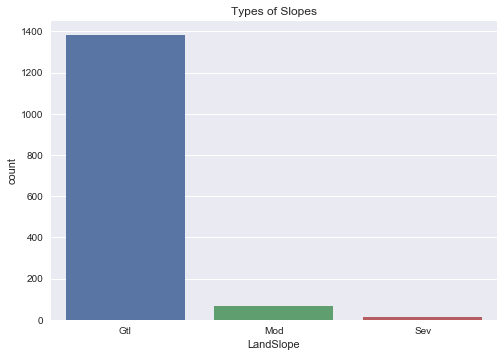

In [41]:
plt.title('Types of Slopes')
sns.countplot(df.LandSlope)

Most of the Slopes tend to be gentle, which means that most of the properties are in flat areas.

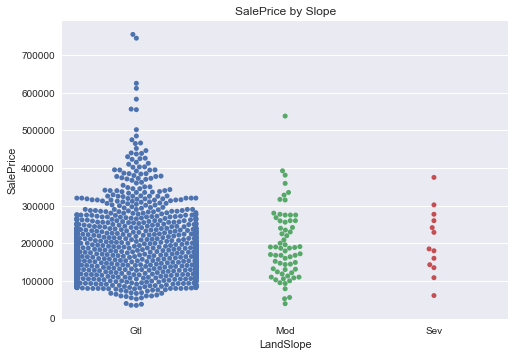

In [42]:
plt.title('SalePrice by Slope')
sns.swarmplot(x='LandSlope',y='SalePrice',data=df)

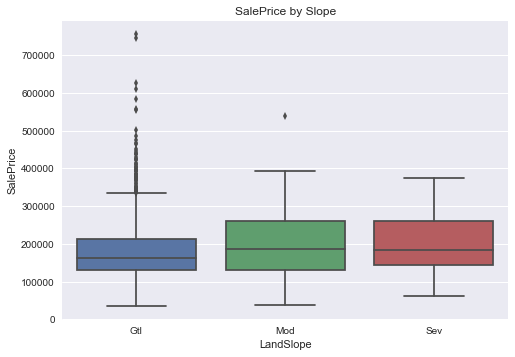

In [43]:
plt.title('SalePrice by Slope')
sns.boxplot(x='LandSlope',y='SalePrice',data=df)

The Slope does not appear to be making as much of an impact on the SalePrice of the property, possibly because of the disparity in the number of properties with gentle slopes and those with more steep inclines.

## Feature Analysis: Utilities

In [45]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

This variable is not useful to the analysis, as all of the properties except for 1 have all public utilities.

## Feature Analysis: Lot Config

In [46]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

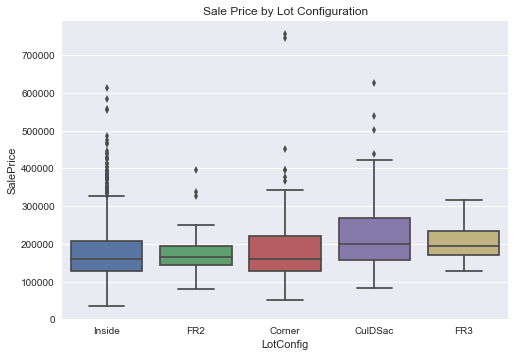

In [47]:
plt.title('Sale Price by Lot Configuration')
sns.boxplot(x="LotConfig",y="SalePrice",data=df)

On average, CulDSacs seem to have a higher sale price. However, since the numbers are skewed to Inside configurations, we don't know how useful this variable will be.

## Feature Analysis: Neighborhood

In [48]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

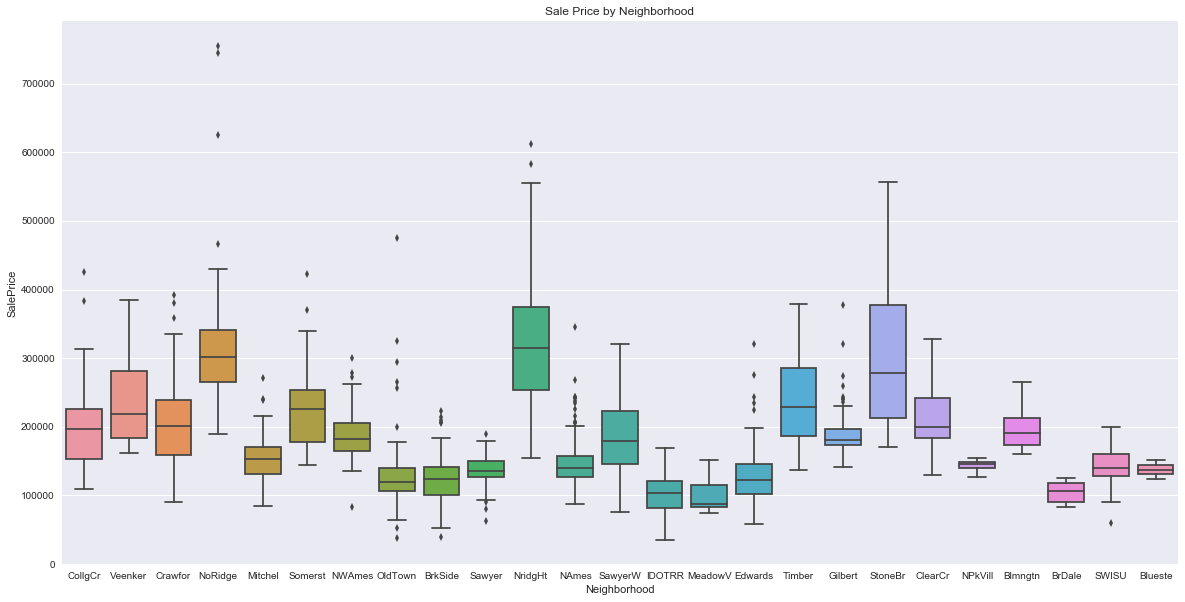

In [57]:
plt.figure(figsize=(20,10))
plt.title('Sale Price by Neighborhood')
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

As one would expect, there are clearly neighborhoods with higher or lower average sale prices. This could end up being a good predictor variable.

## Feature Analysis: Condition1 and Condition2

In [58]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [59]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

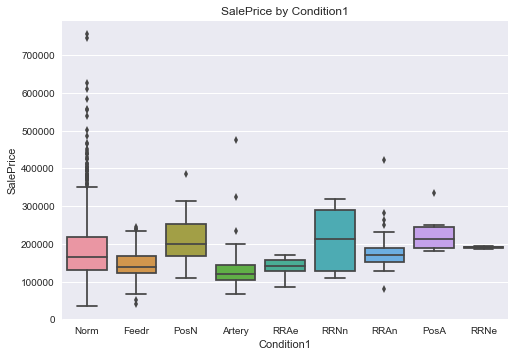

In [60]:
plt.title('SalePrice by Condition1')
sns.boxplot(x='Condition1',y='SalePrice',data=df)

Overall, some conditions seem to command a higher price than others, but most properties by far are Normal, limiting the usefulness of the variables